Importing Libraries

In [2]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from tqdm.notebook import tqdm 

# Configuration 



Dataset available on kaggle : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [4]:
pip install kagglehub

   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.0 kB ? eta -:--:--
   ---------------------------------------- 63.0/63.0 kB 676.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\ahmed\python 3-11-4\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub

custom_path = 'D:\learning-pytorch\projects'
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia",path=custom_path)
print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [18:48<00:00, 2.18MB/s] 

Extracting files...


Path to dataset files: C:\Users\ahmed\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [3]:
class Configuration:
    
    epochs = 10
    lr = 0.001
    batch_size = 16
    
    model_name = 'tf_efficientnet_b4_ns'
    img_size = 224
    channel = 3
    
    DATA_DIR = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray"                        
    TEST = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray/test"                                      
    TRAIN = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray/train"                                    
    VAL = r"D:/learning-pytorch/projects/Pneumonia Classification/chest_xray/chest_xray/val"                                         

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("On which device we are on : {}".format(device))

On which device we are on : cpu


Accessing Intel GPU  
There is a option to acces Intel GPU, but only for following processors.  
Hardware Verified with Windows® 10 and 11
- Intel® Arc™ A-Series Graphics
- Intel® Core™ Ultra Processors with Intel Arc Graphics
- Intel Core Ultra Processors Series 2 with Intel Arc Graphics
- Intel Arc B-Series Graphics

# Image Transformation and Load Dataset 

In [5]:
from torchvision import transforms as T, datasets
from helper import show_image

Data Augmentation

In [6]:
train_transform = T.Compose([
    T.Resize(size = (Configuration.img_size,Configuration.img_size)),
    T.RandomRotation(degrees= (-20,+20)),
    T.ToTensor(), # (h,w,c) -> (c,h,w)
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

valid_transform = T.Compose([
    T.Resize(size = (Configuration.img_size,Configuration.img_size)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

test_transform = T.Compose([
    T.Resize(size = (Configuration.img_size,Configuration.img_size)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [7]:
trainset = datasets.ImageFolder(Configuration.TRAIN,transform=train_transform)
testset = datasets.ImageFolder(Configuration.TEST,transform=test_transform)
validset = datasets.ImageFolder(Configuration.VAL,transform=valid_transform)

In [8]:
print("Trainset Size : {}".format(len(trainset)))
print("Validset Size : {}".format(len(validset)))
print("Testset Size : {}".format(len(testset)))

Trainset Size : 5216
Validset Size : 16
Testset Size : 624


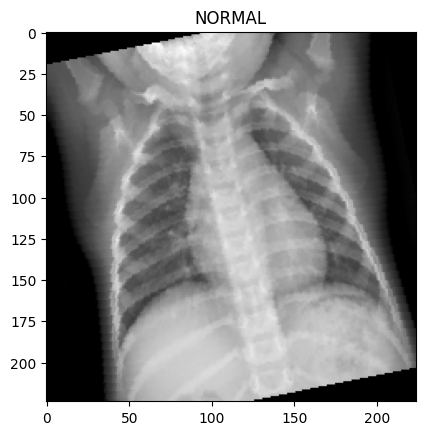

In [9]:
image,label = trainset[2]
class_name = ['NORMAL','PNUEMONIA']

show_image(image,class_name[label])

# Load Dataset into Batches

In [10]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from helper import show_grid

In [11]:
trainloader = DataLoader(
    trainset , 
    batch_size=Configuration.batch_size,
    shuffle=True
    )

testloader = DataLoader(
    testset , 
    batch_size=Configuration.batch_size,
    shuffle=True
    )

validloader = DataLoader(
    validset , 
    batch_size=Configuration.batch_size,
    shuffle=True
    )

In [12]:
print(f'Train Images Batches {len(trainloader)}')
print(f'Train Images: {len(trainset)}')

print(f'Test Images Batches {len(testloader)}')
print(f'Test Images: {len(testset)}')

print(f'Valid Images Batches {len(validloader)}')
print(f'Valid Images: {len(validset)}')

Train Images Batches 326
Train Images: 5216
Test Images Batches 39
Test Images: 624
Valid Images Batches 1
Valid Images: 16


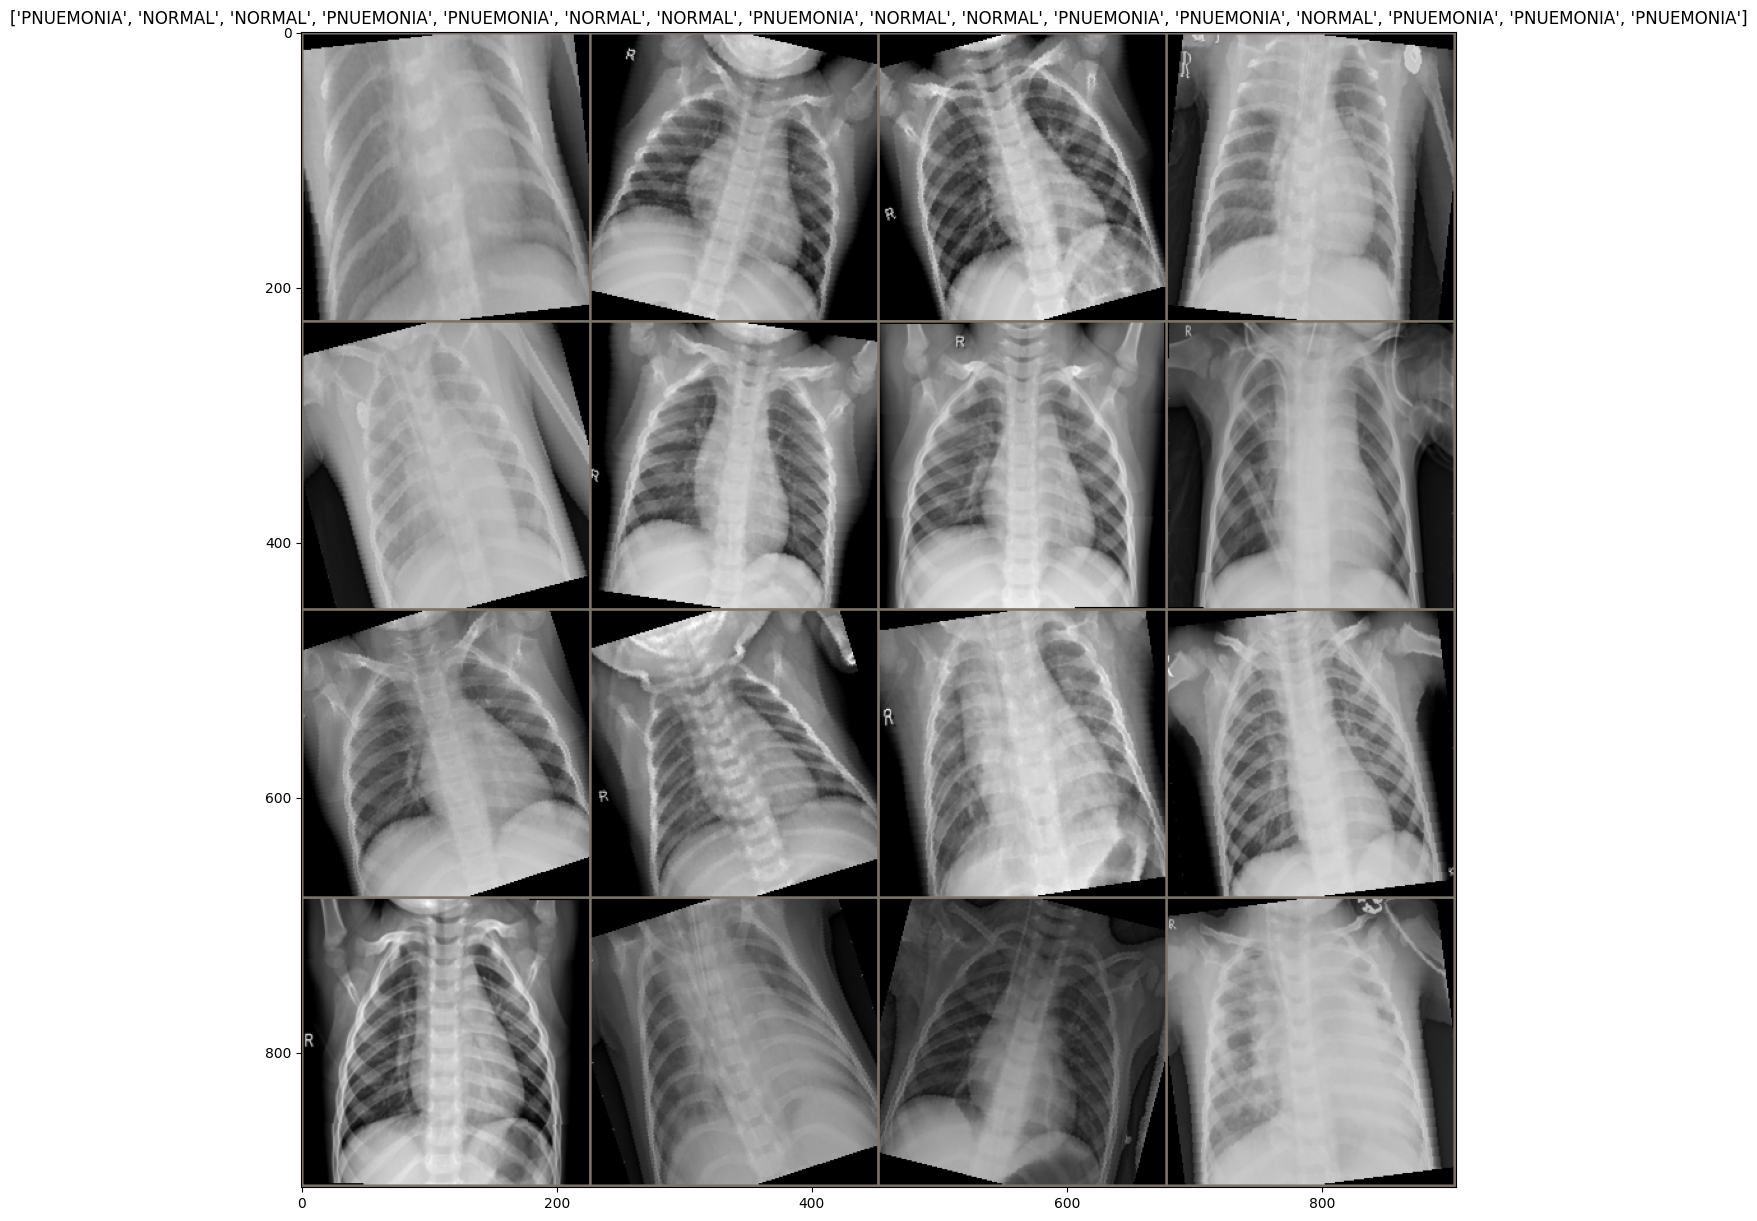

In [13]:
dataiter = iter(trainloader)
images,labels = next(dataiter)
out = make_grid(images,nrow=4)
show_grid(out,title=[class_name[x] for x in labels])

# Fine Tune Efficient Model

In [64]:
pip install timm

     ---------------------------------------- 0.0/52.0 kB ? eta -:--:--
     ---------------------------------------  51.2/52.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 52.0/52.0 kB 889.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 5.1 MB/s eta 0:00:01
   - -------------------------------------- 0.1/2.4 MB 5.1 MB/s eta 0:00:01
   - -------------------------------------- 0.1/2.4 MB 5.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.4 MB 1.6 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.4 MB 1.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.4 MB 1.5 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.4 MB 1.6 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.4 MB 1.6 MB/s eta 0:00:02
   ---------- ----------------------------- 0.6/2.4 MB 1.6 MB/s eta 0:00:02
   ----------- 

DEPRECATION: Loading egg at c:\users\ahmed\python 3-11-4\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from torch import nn
import timm
import torch.nn.functional as F

In [15]:
model = timm.create_model(
    Configuration.model_name,
    pretrained = True
    )
model

c:\Users\ahmed\Python 3-11-4\Lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name tf_efficientnet_b4_ns to current tf_efficientnet_b4.ns_jft_in1k.
  model = create_fn(


EfficientNet(
  (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNormAct2d(
          48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNo

We are going to fine-tune last layer of efficient, for that we need to freezer prior layers

In [16]:
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(
    nn.Linear(in_features=1792 , out_features=625),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=625 , out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256 , out_features=2),
)

model

EfficientNet(
  (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNormAct2d(
          48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNo

In [17]:
from torchsummary import summary

In [18]:
summary(
    model,
    input_size=(Configuration.channel,Configuration.img_size,Configuration.img_size)
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dSame-1         [-1, 48, 112, 112]           1,296
          Identity-2         [-1, 48, 112, 112]               0
              SiLU-3         [-1, 48, 112, 112]               0
    BatchNormAct2d-4         [-1, 48, 112, 112]              96
            Conv2d-5         [-1, 48, 112, 112]             432
          Identity-6         [-1, 48, 112, 112]               0
              SiLU-7         [-1, 48, 112, 112]               0
    BatchNormAct2d-8         [-1, 48, 112, 112]              96
          Identity-9         [-1, 48, 112, 112]               0
           Conv2d-10             [-1, 12, 1, 1]             588
             SiLU-11             [-1, 12, 1, 1]               0
           Conv2d-12             [-1, 48, 1, 1]             624
          Sigmoid-13             [-1, 48, 1, 1]               0
    SqueezeExcite-14         [-1, 48, 1

# Build PyTorch Trainer

In [19]:
from helper import accuracy
from tqdm import tqdm

In [20]:
class PneumoniaTrainer:
    def __init__(self, criterion, optimizer, scheduler):
        self.criterion = criterion,
        self.optimizer = optimizer,
        self.scheduler = scheduler
    
    def train_batch_loop(self, model, trainloader):
        train_acc = 0.0
        train_loss = 0.0
        
        for images, labels in tqdm(trainloader):
            images = images.to(device)
            labels = labels.to(device)
            
            logits = model(images)
            loss = self.criterion(logits,labels)
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            train_loss += loss.item()
            train_acc += accuracy(logits,labels)
            
        return train_acc / len(trainloader) , train_loss / len(trainloader)
    
    
    def valid_batch_loop(self, model, validloader):
        valid_acc = 0.0
        valid_loss = 0.0
        
        for images, labels in tqdm(validloader):
            images = images.to(device)
            labels = labels.to(device)
            
            logits = model(images)
            loss = self.criterion(logits,labels)
            
            valid_loss += loss.item()
            valid_acc += accuracy(logits,labels)
            
            return valid_acc / len(validloader) , valid_loss / len(validloader)
            
    
    
    def fit(self, model, trainloader, validloader, epochs):
        model = model.to(device)
        valid_min_loss = np.Inf
        
        for i in range(epochs):
            model.train()
            avg_train_acc, avg_train_loss = self.train_batch_loop(model,trainloader)
            model.eval()
            avg_valid_acc,avg_valid_loss = self.valid_batch_loop(model, validloader)
            
            if avg_valid_loss <= valid_min_loss:
                print(f'Valid loss decreased {valid_min_loss} --> {avg_valid_loss}')
                torch.save(model.state_dict(),'PneimoniaModel.pt')
                valid_min_loss = avg_valid_loss
                
            print(f'Epoch: {i+1} Train Loss: {avg_train_loss}  Train Acc: {avg_train_acc}')
            print(f'Epoch: {i+1} Valid Loss: {avg_valid_loss}  Valid Acc: {avg_valid_acc}')

# Training a Model

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=Configuration.lr)

schedular = None
trainer = PneumoniaTrainer(criterion,optimizer,schedular)
trainer.fit(model,trainloader,validloader,epochs=Configuration.epochs)

# Plot Results

In [ ]:
from helper import view_classify

In [ ]:
model.load_state_dict(torch.load('/content/ColabPneumoniaModel.pt'))
model.eval()

avg_test_loss, avg_test_acc = trainer.valid_batch_loop(model,testloader)


print("Test Loss : {}".format(avg_test_loss))
print("Test Acc : {}".format(avg_test_acc))

In [ ]:
import torch.nn.functional as F

image,label = testset[324]

ps = model(image.to(device).unsqueeze(0))
ps = F.softmax(ps,dim = 1)

view_classify(image,ps,label)